In [25]:
print("Hello world");

Hello world


# Learning some NLPs

This code are based on [Analytics Vidhya's website](https://www.analyticsvidhya.com/blog/2021/05/natural-language-processing-step-by-step-guide/)

In [26]:
import pandas;
import re;

# Stemming
import nltk; # Natural Language ToolKit
from nltk.corpus import stopwords; 
from nltk.stem.porter import PorterStemmer;

# Data Visualization
import matplotlib.pyplot as plt;
import seaborn;

from wordcloud import WordCloud;

In [27]:
# Exclude the number column and header row.
data_frame = pandas.read_csv("Womens Clothing E-Commerce Reviews.csv", header = 0, index_col = 0);
print(data_frame.head());

   Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2       

# Dataset pre-processing
This whole part of this book is dataset pre-processing. There are several things to be clear within this part:

1. Finding information regarding the dataset within by visualize the data conditions.
2. Downloading stop words dictionary in english using `nltk`. However, this is not needed once you have a dataset of stop words that contain all stop words in certain of language, and using \n as its seperator between data.
3. Stemming, Lemmatization normalization, and Stop Words removal

In [28]:
# Count data with None entry
print(data_frame.isna().sum());

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


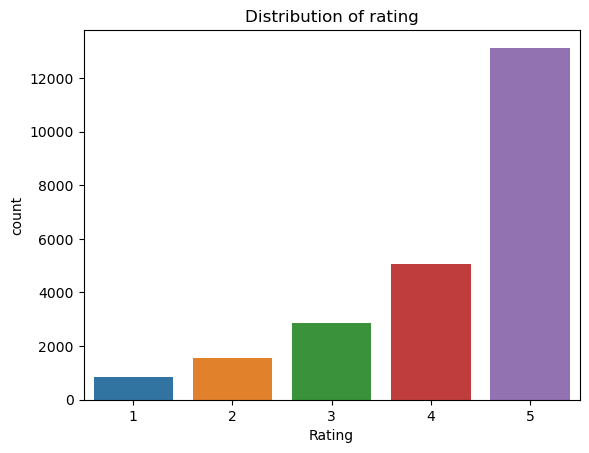

In [29]:
seaborn.countplot(x = "Rating", data = data_frame);

# Basically see how much data rating distributed across the data.
plt.title("Distribution of rating");

## Downloading the stopwords dictionary 

In [30]:
nltk.download("stopwords");
stops = stopwords.words("english");

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yosuakristianto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tokenization Part

In [31]:
reviews = data_frame[["Review Text", "Recommended IND"]];
reviews = pandas.DataFrame(reviews);

"""
tokenization

This method is used to do tokenization within string. These steps below applied within the function:

1. Replace any non-alphabet characters to white space. 
    Since ^a-zA-Z is means the negation of any character that contains a-zA-Z in which means alphabet, the negation will then target the non-alphabet characters.

2. Set all characters to lower
    Yeah this is called as text normalization and it is required.

@params 
    words (obj | str)
"""
def tokenization(words):
    words = re.sub("[^a-zA-Z]"," ", str(words)); # Replace any non-alphabet characters to white space.  
    text = words.lower().split(); # Set all characters to lower
    return " ".join(text);

reviews["Review_Clean"] = reviews["Review Text"].apply(tokenization);
reviews.head()

,Review Text,Recommended IND,Review_Clean
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky and sexy and comfor...
1,Love this dress! it's sooo pretty. i happene...,1,love this dress it s sooo pretty i happened to...
2,I had such high hopes for this dress and reall...,0,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,i love love love this jumpsuit it s fun flirty...
4,This shirt is very flattering to all due to th...,1,this shirt is very flattering to all due to th...


# Stemming, removing Stop Words

In [32]:
corpus = [];

for i, e in enumerate(reviews["Review Text"]):
    e = str(e);

    # Normalize the text (why ???)
    review = re.sub("[^a-zA-Z]"," ", e); # Replace any non-alphabet characters to white space.  
    review = review.lower().split(); # Set all characters to lower

    # Stemming 
    porter_stemmer = PorterStemmer();
    review = [
        porter_stemmer.stem(" ".join(review)) 
        for word in review 
        if not word in set(stops)]; 

    stemmed_text = " ".join(review);
    corpus.append(stemmed_text); # Append the stemmed text to the corpus array.

# Mmmmm missing link...

So, basically, this part supposed to be visualizing the data within review clean dataframe, unfortunately, the tutorial didn't give any sign how to get any positive or negative value within the dataaset.

In [33]:
reviews["Review_Clean"].head()

0    absolutely wonderful silky and sexy and comfor...
1    love this dress it s sooo pretty i happened to...
2    i had such high hopes for this dress and reall...
3    i love love love this jumpsuit it s fun flirty...
4    this shirt is very flattering to all due to th...
Name: Review_Clean, dtype: object

In [62]:
positive_reviews = " ".join(reviews[reviews["Recommended IND"] == 1]["Review_Clean"]);
negative_reviews = " ".join(reviews[reviews["Recommended IND"] == 0]["Review_Clean"]);

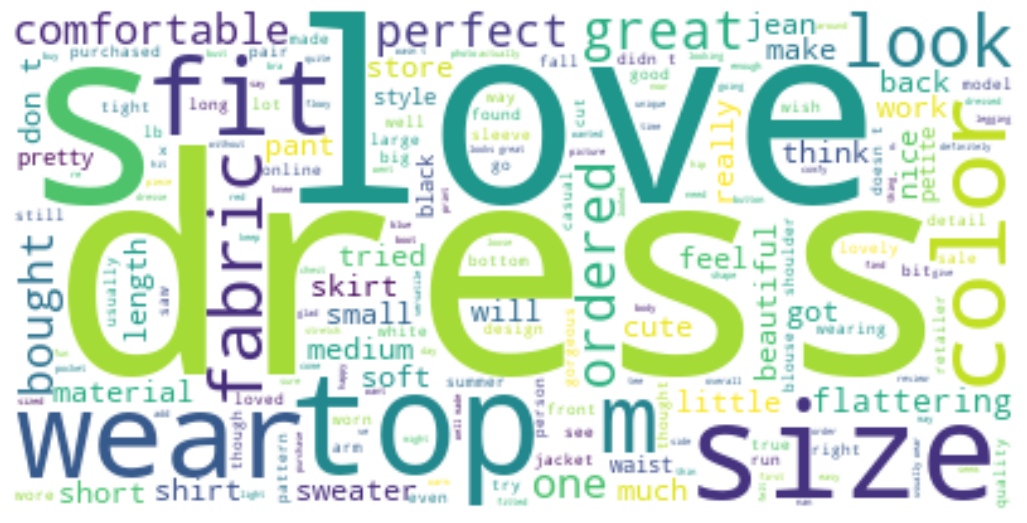

In [64]:
wordcloud = WordCloud(background_color = "white", max_words = len(negative_reviews));
wordcloud.generate(positive_reviews);

plt.figure(figsize = (13, 13));
plt.imshow(wordcloud, interpolation = "bilinear");
plt.axis("off");
plt.show();